In [144]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Ecuaciones diferenciales ordinarias

La mayoría de los fenónenos físicos se expresan en el lenguaje de las ecuaciones diferenciales. Sin embargo, en la mayoría de las ocasiones, encontrar soluciones cerradas para una ecuación diferencial ordinaria puede no ser posible. Es por eso que, en tales casos, se tiene que recurrir a métodos numéricos que puedan aproximar las soluciones a estas ecuaciones. En el presente cuaderno se realizará una exploración de 3 métodos.

# Definición de la ecuación diferencial

Pondremos nuestra atención en la ecuación diferencial

## $$y'(x) = y + \sqrt{x^{2} + y^{2}},$$

con condición inicial $y(0) = 1$. En la siguiente celda de código definimos la ecuación diferencial mediante una función.

In [145]:
def y_prima(x, y): return y + np.sqrt(x**2 + y**2)

# Método de Euler

Este es quizás el método numérico más sencillo para calcular soluciones a ecuaciones diferenciales ordinarias. Sin embargo, es extremadamente ineficiente, y por lo general necesita de tamaños de paso muy pequeños para dar aproximaciones medianamente buenas. La fórmula para el método de Euler es la siguiente

$$y_{i + 1} = y_{i} + h \cdot f(x_{i}, y_{i})$$
$$x_{i + 1} = x_{i} + h,$$
    
donde $h$ es el tamaño de paso escogido. En la siguiente celda está el método codificado.


In [146]:
def euler(f, x0, y0, h, xf):
    
    n = int((xf - x0) / h)

    X = [x0]
    Y = [y0]
    
    for i in range(n):
        
        xi = X[-1] + h
        yi = Y[-1] + h * f(X[-1], Y[-1])
        
        X.append(xi)
        Y.append(yi)
        
    return X, Y, yi

# Análisis del método de Euler

### Para $h = 0.5$

In [147]:
X, Y, y = euler(y_prima, 0, 1, 0.5, 3)

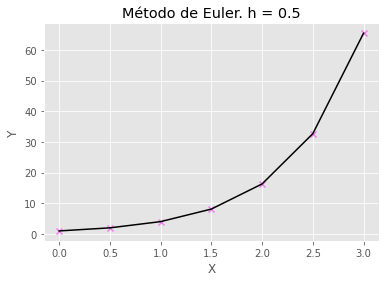

In [148]:
plt.plot(X, Y, color = 'black')
plt.scatter(X, Y, marker = 'x', color = 'violet')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Método de Euler. h = 0.5")
plt.show()

Observamos de la gráfica anterior que, aunque si bien en cada iteración se aumenta el valor de $y$, el error es demasiado grande (en los proximos métodos veremos que aquí se tiene un error casi del... ¡200%!). Así pues, vemos que el método de Euler para tamaños de paso grandes es muy poco eficiente.

###  Para $h = 0.1$

In [149]:
X, Y, y = euler(y_prima, 0, 1, 0.1, 3)

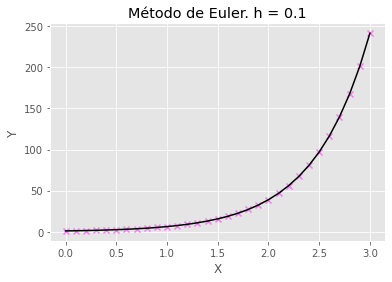

In [150]:
plt.plot(X, Y, color = 'black')
plt.scatter(X, Y, marker = 'x', color = 'violet')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Método de Euler. h = 0.1")
plt.show()

Aquí podemos apreciar una mejora considerable con respecto al anterior tamaño de paso. Sin embargo, sigue estando por debajo de las soluciones verdaderas de la ecuación diferenciall. A continuación, observaremos dos métodos que nos permitirán obtener soluciones mucho mejores que las obtenidas con el método de Euler.

# Sobre los métodos de Runge - Kutta

Los métodos que veremos a continuación se conocen como métodos de Runge - Kutta. Son métodos iterativos en los cuales se específica un tamaño de paso, y en cada iteración se obtienen distintas soluciones correspondientes al valor actual de $x$, hasta llegar al valor deseado en la iteración final.

# Método de Runge - Kutta 2do orden

Este método viene dada por las siguientes fórmulas:

$$y_{i + 1} = y_{i} + \dfrac{h}{2}(k_{1} + k_{2}) $$

donde $h$ representa el tamaño de paso y las demás variables vienen dadas por las fórmulas

$$k_{1} = f(x_{i}, y_{i})$$ 
$$k_{2} = f(x_{i} + h, y_{i} + k_{1} \cdot h),$$

donde $x_{i}$ y $y_{i}$ corresponden a los valores de $x$ e $y$ en la $i$ - ésima iteración. Este método está codificado en la siguiente celda de código.

In [151]:
def rk_segundo(f, x0, y0, h, xf):
    
    n = int((xf - x0) / h)
    
    X = [x0]
    Y = [y0]

    for i in range(n):
        
        xi = X[-1]
        yi = Y[-1]
        
        k1 = f(xi, yi)
        k2 = f(xi + h, yi + k1 * h)

        y_imas = yi + (h / 2) * (k1 + k2)
        
        X.append(X[-1] + h)
        Y.append(y_imas)
    
    return X, Y, y_imas, 

# Análisis del método de Runge - Kutta 2do orden

A continuación examinaremos los resultados del método de Runge - Kutta de segundo orden mediante graficas para cada tamaño de paso.

###  Para $h = 0.5$



In [152]:
X, Y, y = rk_segundo(y_prima, 0, 1, 0.5, 3)

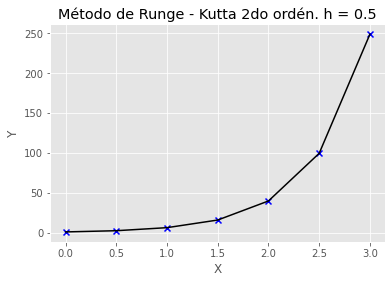

In [153]:
plt.plot(X, Y, color = 'black')
plt.scatter(X, Y, marker = 'x', color = 'blue')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Método de Runge - Kutta 2do ordén. h = 0.5")
plt.show()

Observamos de la gráfica anterior que obtenemos 7 soluciones para el intervalo dado. Sin embargo, dado que hemos usado un tamaño de paso bastante grande, es muy probable que estas soluciones no logren aproximarse lo suficiente como para poder ser consideradas. También es evidente, dada la naturaleza 'tosca' que presenta la gráfica.

### Para $h = 0.1$

In [154]:
X, Y, y = rk_segundo(y_prima, 0, 1, 0.1, 3)

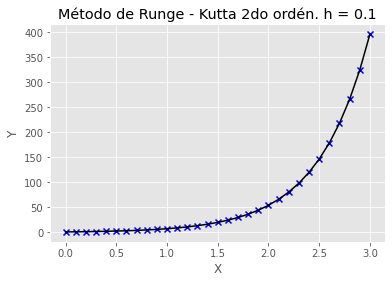

In [155]:
plt.plot(X, Y, color = 'black')
plt.scatter(X, Y, marker = 'x', color = 'blue')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Método de Runge - Kutta 2do ordén. h = 0.1")
plt.show()

De la anterior gráfica, observamos una mejora considerable en la calidad de las soluciones. Ya que hemos usado un tamaño de paso más pequeño, las iteraciones cada vez van llegando de forma más precisa a los valores deseados. Dado que $h = 0.1$, contamos con 300 distintas aproximaciones dentro del intervalo dado.

# Método de Runge - Kutta 4to orden

A continuación vamos a ver el método de Runge - Kutta de 4to orden. Es muy parecido al método de segundo orden, con la diferencia en que aquí contamos con más variables $k_{i}$. Las fórmulas para este método están dadas por

$$y_{i + 1} = y_{i} + \dfrac{1}{6}(k_{1} + 2k_{2} + 2k_{3} + k_{4}) \cdot h,$$

donde los distintos valores de $k_{i}$ están dados por 

$$k_{1} = f(x_{i}, y_{i})$$
$$k_{2} = f(x_{i} + \dfrac{h}{2}, y_{i} + k_{1}\dfrac{h}{2})$$
$$k_{3} = f(x_{i} + \dfrac{h}{2}, y_{i} + k_{2}\dfrac{h}{2})$$
$$k_{4} = f(x_{i} + \dfrac{h}{2}, y_{i} + k_{3}\dfrac{h}{2}),$$

y $h$ corresponde al tamaño de paso escogido.

In [156]:
def rk_cuarto(f, x0, y0, h, xf):
    
    n = int((xf - x0) / h)
    
    X = [x0]
    Y = [y0]
    
    for i in range(n):
        
        xi = X[-1]
        yi = Y[-1]

        k1 = f(xi, yi)
        k2 = f(xi + h/2, yi +  k1 * (h / 2))
        k3 = f(xi + h/2, yi +  k2 * (h / 2))
        k4 = f(xi + h/2, yi +  k3 * (h / 2))
        
        y_imas = yi + (1/6) * (k1 + 2*k2 + 2*k3 + k4) * h
        
        X.append(X[-1] + h)
        Y.append(y_imas)
        
    return X, Y, y_imas, 

# Análisis del método de Runge - Kutta 4to orden

A continuación examinaremos los resultados del método de Runge - Kutta de cuarto orden mediante graficas para cada tamaño de paso.

###  Para $h = 0.5$


In [157]:
X, Y, y = rk_cuarto(y_prima, x0 = 0, y0 = 1, h = 0.5, xf = 3)

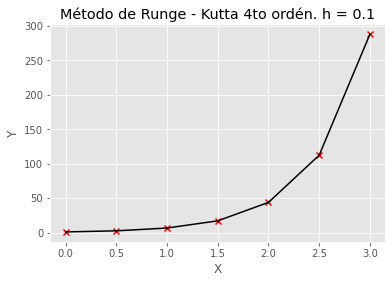

In [158]:
plt.plot(X, Y, color = 'black')
plt.scatter(X, Y, marker = 'x', color = 'red')
plt.title("Método de Runge - Kutta 4to ordén. h = 0.1")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

Al igual que con el método de Runge - Kutta de segundo orden, observamos de la gráfica anterior que obtenemos 7 soluciones para el intervalo dado. Sin embargo, dado que hemos usado un tamaño de paso bastante grande, es muy probable que estas soluciones no logren aproximarse lo suficiente como para poder ser consideradas. También es evidente, dada la naturaleza 'tosca' que presenta la gráfica.




###  Para $h = 0.1$

In [159]:
X, Y, y = rk_cuarto(y_prima, x0 = 0, y0 = 1, h = 0.1, xf = 3)

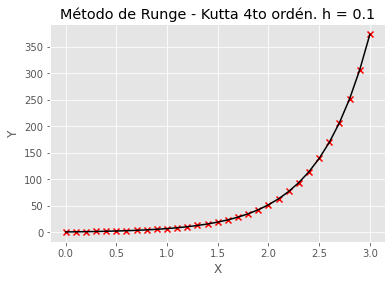

In [160]:
plt.plot(X, Y, color = 'black')
plt.scatter(X, Y, marker = 'x', color = 'red')
plt.title("Método de Runge - Kutta 4to ordén. h = 0.1")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

De la anterior gráfica, observamos una mejora considerable en la calidad de las soluciones. Ya que hemos usado un tamaño de paso más pequeño, las iteraciones cada vez van llegando de forma más precisa a los valores deseados. Dado que $h = 0.1$, contamos con 300 distintas aproximaciones dentro del intervalo dado.